# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.992370e+01     5.908342e+00
 * time: 0.004893064498901367
     1     2.900969e+01     5.390832e+00
 * time: 0.014376163482666016
     2     2.370423e+01     7.036374e+00
 * time: 0.03732109069824219
     3     1.601952e+01     3.241995e+00
 * time: 0.06628918647766113
     4     1.262097e+01     2.555322e+00
 * time: 0.09154605865478516
     5     1.117111e+01     1.972581e+00
 * time: 0.1095571517944336
     6     1.018896e+01     1.337621e+00
 * time: 0.12795305252075195
     7     9.830403e+00     1.070549e+00
 * time: 0.14589715003967285
     8     9.255100e+00     1.042592e+00
 * time: 0.16411805152893066
     9     8.901645e+00     5.988084e-01
 * time: 0.1821730136871338
    10     8.723115e+00     6.899821e-01
 * time: 0.20021414756774902
    11     8.625391e+00     5.643601e-01
 * time: 0.2179701328277588
    12     8.593383e+00     5.391807e-01
 * time: 0.23160004615783691
    13     8.539243e+00     3.604708e-01
 * time: 

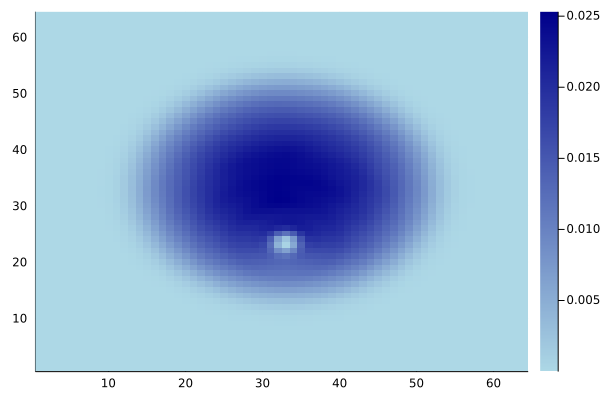

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)